<a href="https://colab.research.google.com/github/vick-ship-it/Exploratory-data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')

In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
unique = data['Doors'].unique()
unique

array([3, 5, 4, 2])

In [ ]:
data['Cylinders'].unique()


array([4])

In [ ]:
data['Weight'].unique()

array([1165, 1170, 1245, 1185, 1105, 1065, 1120, 1100, 1255, 1270, 1110,
       1195, 1180, 1075, 1130, 1275, 1060, 1115, 1265, 1260, 1125, 1155,
       1045, 1480, 1320, 1280, 1135, 1090, 1150, 1085, 1160, 1205, 1084,
       1140, 1095, 1025, 1119, 1080, 1121, 1615, 1067, 1040, 1030, 1055,
       1050, 1103, 1070, 1035, 1015, 1000, 1078, 1079, 1109, 1020, 1010,
       1114, 1172, 1094, 1083])

In [ ]:
unique = data['Gears'].unique()
unique

array([5, 6, 3, 4])

In [ ]:
data['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332])

In [ ]:
unique = data['Automatic'].unique()
unique

array([0, 1])

In [ ]:
data.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data.shape

(1436, 11)

In [ ]:
data.isnull().any()

,0
Price,False
Age_08_04,False
KM,False
Fuel_Type,False
HP,False
Automatic,False
cc,False
Doors,False
Cylinders,False
Gears,False


In [ ]:
data.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
#price has outliers
#KM
#cc
#weights

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1431,False
1432,False
1433,False
1434,False


In [ ]:
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
data_cleaned1 = data.drop_duplicates()
data_cleaned1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data_cleaned1.duplicated().sum()

0

In [ ]:
data_cleaned1.reset_index(inplace=True)

In [ ]:
data_cleaned1

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      1435 non-null   int64 
 1   Price      1435 non-null   int64 
 2   Age_08_04  1435 non-null   int64 
 3   KM         1435 non-null   int64 
 4   Fuel_Type  1435 non-null   object
 5   HP         1435 non-null   int64 
 6   Automatic  1435 non-null   int64 
 7   cc         1435 non-null   int64 
 8   Doors      1435 non-null   int64 
 9   Cylinders  1435 non-null   int64 
 10  Gears      1435 non-null   int64 
 11  Weight     1435 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 134.7+ KB


In [ ]:

data_cleaned1=data_cleaned1.drop(["Cylinders"],axis=1)
data_cleaned1

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


## outliers treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f520a440>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f520a860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f520a1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f520ada0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f520b040>],
 'means': []}

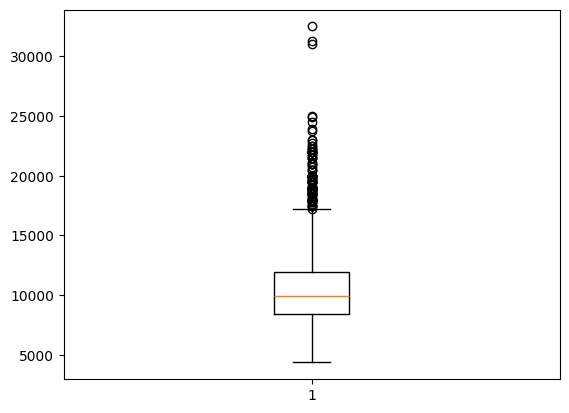

In [ ]:
plt.boxplot(data_cleaned1['Price'])

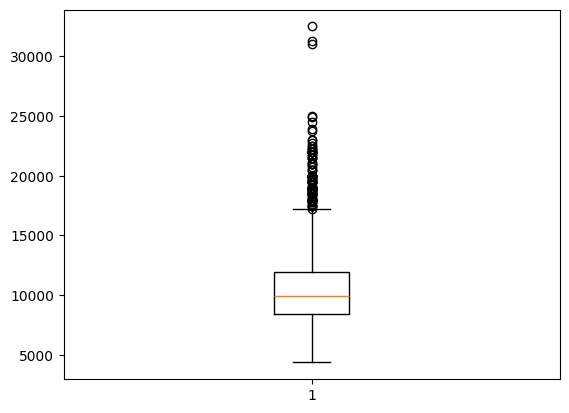

In [ ]:
price_box=plt.boxplot(data_cleaned1['Price'])

In [ ]:
for i,j in price_box.items():
  #print(f"i -> {i}\n")
  #print(f"j -> {j}")
  print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x7ee7f527d390>, <matplotlib.lines.Line2D object at 0x7ee7f527d630>]
caps [<matplotlib.lines.Line2D object at 0x7ee7f527d8d0>, <matplotlib.lines.Line2D object at 0x7ee7f527db70>]
boxes [<matplotlib.lines.Line2D object at 0x7ee7f527d0f0>]
medians [<matplotlib.lines.Line2D object at 0x7ee7f527de10>]
fliers [<matplotlib.lines.Line2D object at 0x7ee7f527e0b0>]
means []


In [ ]:
out=[]
for item in price_box["fliers"]:
    out.append(item.get_ydata())

out

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950])]

In [ ]:
[item.get_ydata() for item in price_box['fliers']]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950])]

In [ ]:
[item.get_ydata()[1] for item in price_box['whiskers']]

[4350.0, 17200.0]

In [ ]:
[item.get_ydata() for item in price_box['boxes']]

[array([ 8450.,  8450., 11950., 11950.,  8450.])]

In [ ]:
data_cleaned1.loc[(data_cleaned1.Price<4350) | (data_cleaned1.Price>17200)]

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
7,7,18600,30,75889,Diesel,90,0,2000,3,5,1245
8,8,21500,27,19700,Petrol,192,0,1800,3,5,1185
10,10,20950,25,31461,Petrol,192,0,1800,3,6,1185
11,11,19950,22,43610,Petrol,192,0,1800,3,6,1185
12,12,19600,25,32189,Petrol,192,0,1800,3,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
181,182,21125,2,225,Petrol,97,0,1400,5,5,1110
182,183,21500,2,15,Petrol,110,0,1600,5,5,1130
183,184,17795,1,1,Petrol,98,0,1400,4,5,1100
184,185,18245,1,1,Petrol,110,0,1600,5,5,1075


In [ ]:
data_cleaned1.loc[data_cleaned1.Price>17200,'Price']=17200

In [ ]:
data_cleaned1.describe()

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,717.921254,10495.964460,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,414.518894,2977.598549,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,0.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,359.500000,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,718.000000,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,1076.500000,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,1435.000000,17200.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f50fe260>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f50fe7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f50fdfc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f50fece0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f50fef80>],
 'means': []}

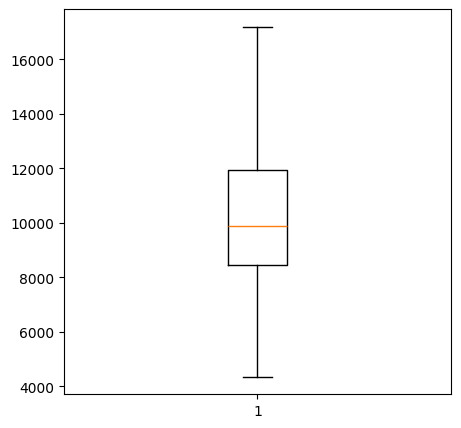

In [ ]:
plt.figure(figsize=(5,5))

plt.boxplot(data_cleaned1['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f516d900>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f516de40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f516d660>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f516e380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f516e620>],
 'means': []}

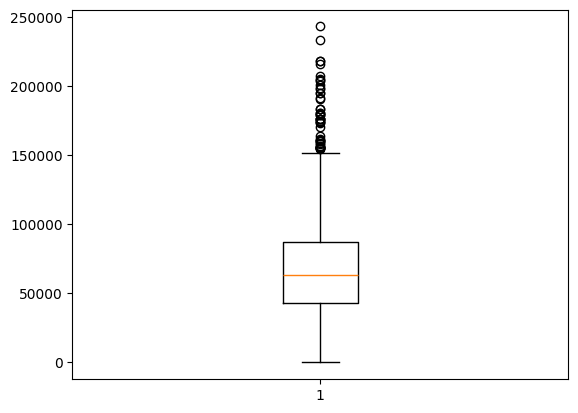

In [ ]:
plt.boxplot(data_cleaned1.KM)

In [ ]:
median_km=data_cleaned1.KM.median()
data_cleaned1['KM']=data_cleaned1['KM'].fillna(median_km)

In [ ]:
data_cleaned1.KM.median()

63451.0

In [ ]:
data_cleaned1.KM.isnull().sum()

0

In [ ]:
data_cleaned1.isnull().sum()

,0
index,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f4ff0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f4ff10f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f4ff0910>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f4ff1630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f4ff18d0>],
 'means': []}

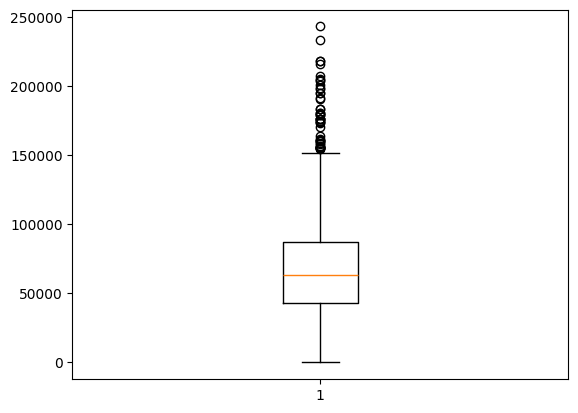

In [ ]:
plt.boxplot(data_cleaned1.KM)

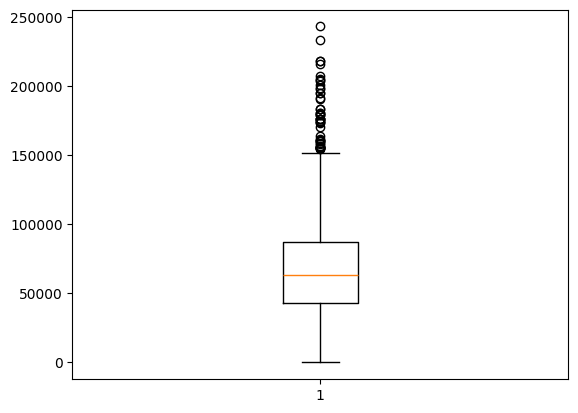

In [ ]:
box_km=plt.boxplot(data_cleaned1.KM)

In [ ]:
for i,j in box_km.items():
  print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x7ee7f5037a00>, <matplotlib.lines.Line2D object at 0x7ee7f5037ca0>]
caps [<matplotlib.lines.Line2D object at 0x7ee7f5037f40>, <matplotlib.lines.Line2D object at 0x7ee7f506c220>]
boxes [<matplotlib.lines.Line2D object at 0x7ee7f5037760>]
medians [<matplotlib.lines.Line2D object at 0x7ee7f506c4c0>]
fliers [<matplotlib.lines.Line2D object at 0x7ee7f506c760>]
means []


In [ ]:
out=[]
for item in box_km['fliers']:
  out.append(item.get_ydata())
out

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900])]

In [ ]:
[item.get_ydata()[1] for item in box_km['whiskers']]

[1.0, 151300.0]

In [ ]:
[item.get_ydata() for item in box_km['fliers']]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900])]

In [ ]:
data_cleaned1.loc[(data_cleaned1.KM<1) | (data_cleaned1.KM>151300)]

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
185,186,6950,43,243000,Diesel,69,0,1900,3,5,1110
186,187,9500,38,180638,Diesel,90,0,2000,4,5,1160
187,188,11950,40,179860,Diesel,90,0,2000,5,5,1205
188,189,7750,43,178858,CNG,110,0,1600,3,5,1084
189,190,11950,40,161000,Diesel,69,0,1900,3,5,1105
190,191,4350,44,158320,Diesel,69,0,1800,5,5,1110
377,378,6500,53,216000,Diesel,69,0,1900,3,5,1110
378,379,6400,51,198167,Diesel,69,0,1900,4,5,1095
379,380,7000,53,176000,Diesel,69,0,1900,3,5,1105
380,381,7750,54,174139,Diesel,72,0,2000,4,5,1100


In [ ]:
data_cleaned1.loc[data_cleaned1.KM>151300,'KM']=151300

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f50dc310>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f50dc850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f50dc070>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f50dcd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f50dd030>],
 'means': []}

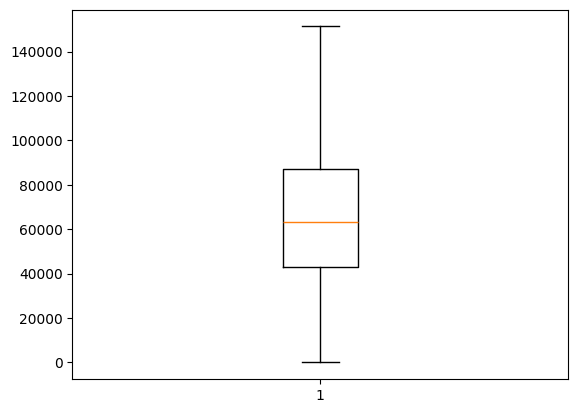

In [ ]:
plt.boxplot(data_cleaned1.KM)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f4f54850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f4f54d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f4f54580>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f4f552d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f50dd840>],
 'means': []}

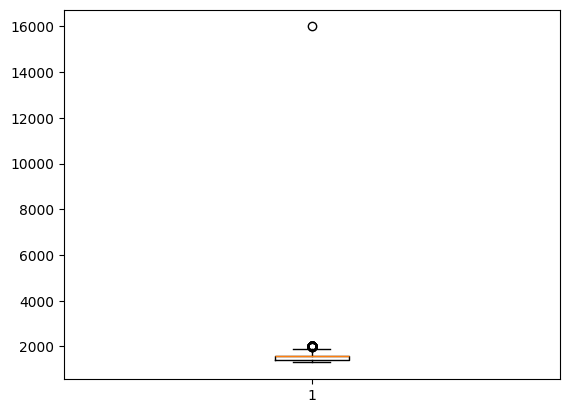

In [ ]:
plt.boxplot(data_cleaned1.cc)

In [ ]:
cc_mode=data_cleaned1.cc.mode()
data_cleaned1['cc']=data_cleaned1['cc'].fillna(cc_mode)


In [ ]:
data_cleaned1.cc.mode()

,cc
0,1600


In [ ]:
data_cleaned1['cc'].isnull().sum()

0

In [ ]:
data_cleaned1.loc[(data_cleaned1.cc<1600) | (data_cleaned1.cc<1600)]

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
30,30,12950,29,9750,Petrol,97,0,1400,3,5,1100
31,31,15750,22,35199,Petrol,97,0,1400,3,5,1100
32,32,15950,27,29510,Petrol,97,0,1400,3,5,1100
33,33,14950,26,32692,Petrol,97,0,1400,3,5,1100
34,34,15500,22,41000,Petrol,97,0,1400,3,5,1100
...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,8450,80,23000,Petrol,86,0,1300,3,5,1015
1430,1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,5,1015


In [ ]:
data_cleaned1.loc[data_cleaned1.cc>1600,'cc']=1600

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f4fbf6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f4fbfc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f4fbf550>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f4df4190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f4df4430>],
 'means': []}

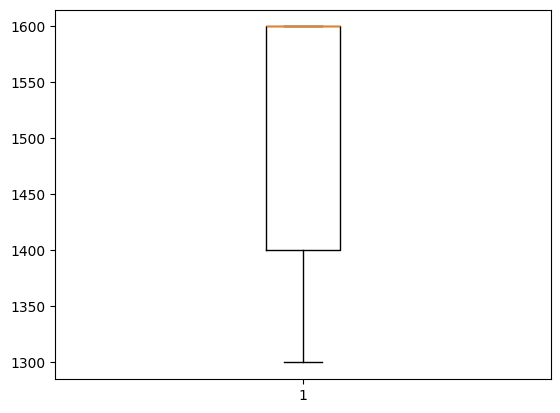

In [ ]:
plt.boxplot(data_cleaned1.cc)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f4e2add0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f4e2b310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f4e2ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f4e2b850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f4e2baf0>],
 'means': []}

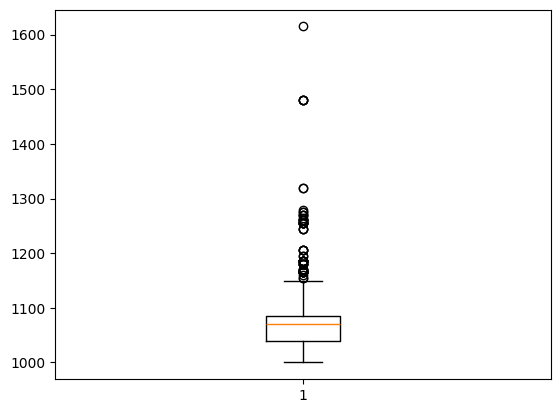

In [ ]:
box_weight=plt.boxplot(data_cleaned1.Weight)
box_weight

In [ ]:
for i, j in box_weight.items():
  print(i,j)


whiskers [<matplotlib.lines.Line2D object at 0x7ee7f4e2add0>, <matplotlib.lines.Line2D object at 0x7ee7f4e2b070>]
caps [<matplotlib.lines.Line2D object at 0x7ee7f4e2b310>, <matplotlib.lines.Line2D object at 0x7ee7f4e2b5b0>]
boxes [<matplotlib.lines.Line2D object at 0x7ee7f4e2ac50>]
medians [<matplotlib.lines.Line2D object at 0x7ee7f4e2b850>]
fliers [<matplotlib.lines.Line2D object at 0x7ee7f4e2baf0>]
means []


In [ ]:
out=[]
for item in box_weight['fliers']:
  out.append(item.get_ydata())
  out

In [ ]:
[item.get_ydata()[1] for items in box_weight['whiskers']]

[1165, 1165]

In [ ]:
[item.get_ydata() for items in box_weight['boxes']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270,
        1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205,
        1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172])]

In [ ]:
[item.get_ydata() for items in box_weight['fliers']]

[array([1165, 1165, 1165, 1165, 1170, 1170, 1245, 1245, 1185, 1185, 1185,
        1185, 1185, 1185, 1185, 1185, 1170, 1255, 1255, 1270, 1255, 1255,
        1195, 1255, 1180, 1195, 1165, 1180, 1275, 1180, 1180, 1245, 1265,
        1260, 1260, 1260, 1155, 1480, 1480, 1480, 1320, 1270, 1280, 1270,
        1255, 1275, 1255, 1320, 1185, 1165, 1180, 1160, 1205, 1205, 1205,
        1170, 1615, 1165, 1205, 1165, 1260, 1260, 1155, 1480, 1172])]

In [ ]:
data_cleaned1.loc[(data_cleaned1.Weight<1165) | (data_cleaned1.Weight>1165)]

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
4,4,13750,30,38500,Diesel,90,0,1600,3,5,1170
5,5,12950,32,61000,Diesel,90,0,1600,3,5,1170
6,6,16900,27,94612,Diesel,90,0,1600,3,5,1245
7,7,17200,30,75889,Diesel,90,0,1600,3,5,1245
8,8,17200,27,19700,Petrol,192,0,1600,3,5,1185
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [ ]:
data_cleaned1.loc[data_cleaned1.Weight>1165,'Weight']=1172

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7f4ecc520>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7f4ecca60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7f4ecc280>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7f4eccfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7f4ecd240>],
 'means': []}

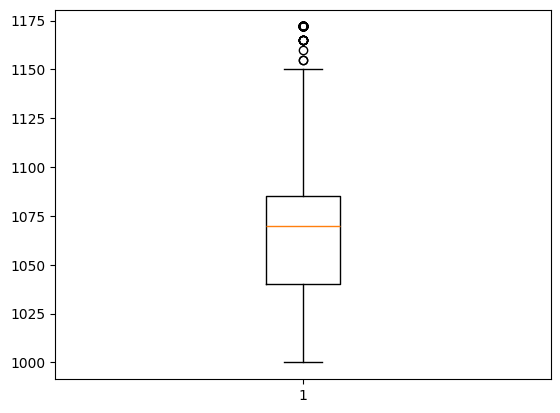

In [ ]:
plt.boxplot(data_cleaned1.Weight)

In [ ]:
data_cleaned1.describe()

,index,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,717.921254,10495.964460,55.980488,67582.928920,101.491986,0.055749,1524.599303,4.032753,5.026481,1069.333101
std,414.518894,2977.598549,18.563312,34574.931015,14.981408,0.229517,120.862753,0.952667,0.188575,39.674818
min,0.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,359.500000,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,718.000000,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,1076.500000,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,1435.000000,17200.000000,80.000000,151300.000000,192.000000,1.000000,1600.000000,5.000000,6.000000,1172.000000
